# Gerardo de Miguel González

## Práctica 2 de Estadística para Data Science

### Problema 1 

*Considera un examen de 10 preguntas con 5 posibles respuestas para cada pregunta en el que se responde al azar. Considera la variable aleatoria X =n ́umero de preguntas acertadas en el examen.*

i) ¿Cuánto valen E(X) y SD(X)?

ii) Calcula la probabilidad de acertar 0, 1, 2, ..., 10 preguntas. ¿Cuánto vale la suma de las
once probabilidades que acabas de calcular?

iii) Calcula las probabilidades acumuladas, es decir la probabilidad de obtener 0 aciertos o
menos, 1 acierto o menos, 2 aciertos o menos ... 10 aciertos o menos.

iv) Representa las probabilidades de los apartados anteriores en una gráfica con dos paneles. Guarda la figura en un archivo. ¿Cuál es el número de aciertos m ́as probable?

## Problema 2 

*En el archivo GOT.txt figura el n ́umero de muertes por cada uno de los 67 primeros cap ́ıtulos de la serie Juego de Tronos.*

i) Razona qué distribución usarías para calcular probabilidades asociadas a esta variable. Representa gráficamente los datos correspondientes al número de muertes de forma que te ayude a decidir qué distribución usar.

ii) Estima la probabilidad de que en el siguiente capítulo haya más de 5 muertes. Explica qué suposiciones has hecho. ¿Podría fallar alguna de las suposiciones?

iii) Calcula la probabilidad de que en el siguiente capítulo haya exactamente 0, 1, 2, ..., 10 muertes. Representa las probabilidades en una gráfica. ¿Cuál es el número de muertes más probable? ¿Cuánto vale la suma de las once probabilidades? ¿Por qué?

iv) ¿Cu ́anto valen E(X) y SD(X)? Explica su significado en este contexto.

### Problema 3 

*Estamos esperando un tren que tiene programada su llegada en breves minutos. Definimos la variable aleatoria X como el tiempo de espera en minutos. La variable aleatoria X tiene función densidad de probabilidad:* 

f(x) = hx si x ∈ [0, 1), f(x) = h si x ∈ [1, 5),
f(x) = h (6 − x) si x ∈ [5, 6], y f(x) = 0 en los demás casos.

i) Representa gráficamente f(x) y calcula la constante h.

ii) Calcula P (X < 1), P (X ≤ 1), P (0 < X ≤ 3)

iii) ¿Cuánto vale E(X)?

### Problema 4 

*El colesterol se mide en una población con media 180 mg/dL y desviacón típica 25 mg/dL.*

**::GMG::** Asumo distribución normal con media = mu y desviacion tipica = sigma

In [2]:
mu <- 180 # mg/dL
sigma <- 25 # mg/dL

i)  Calcula la probabilidad de que una persona tenga más de 225 mg/dL de colesterol en sangre.

In [3]:
p_mas_de <- 1 - pnorm(q = 225, mean = mu, sd = sigma)
print(paste("Probabilidad de que una persona tenga más de 225 mg/dL: ", p_mas_de))

[1] "Probabilidad de que una persona tenga más de 225 mg/dL:  0.0359303191129258"


ii)  Calcula el percentil del 95% de colesterol en sangre en dicha población.

In [4]:
percentil <- 0.95
qnorm(p = percentil,mean = mu,sd = sigma)

[1] 221.1213

iii) Representa la función de densidad y la función de distribución en una gráfica con dos paneles.

In [33]:
xseq <- seq(0,12*sigma,.5)
dens <- dnorm(x = xseq,mean = mu,sd = sigma)
dist <- pnorm(q = xseq,mean = mu,sd = sigma)

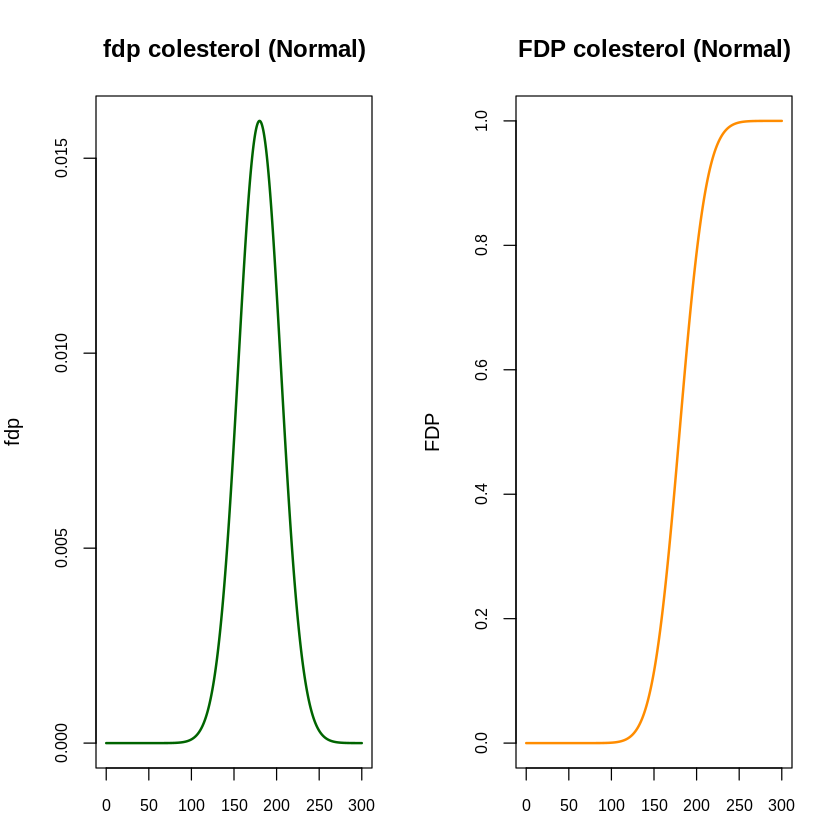

In [35]:
par(mfrow=c(1,2), mar=c(3,4,4,2))
plot(xseq, dens, col="darkgreen",
     xlab="", ylab="fdp", 
     type="l",lwd=2, cex=2, 
     main="fdp colesterol (Normal)", cex.axis=.8)
plot(xseq, dist, col="darkorange", 
     xlab="", ylab="FDP",
     type="l",lwd=2, cex=2, 
     main="FDP colesterol (Normal)", cex.axis=.8)

iv) ¿Cuánto valen E(X) y SD(X)?